## Landsat Modist Regresion

If sklearn deap no install descoment next line

In [1]:
#!pip install sklearn-deap

If psycopg2 or  no install descoment next line

In [2]:
#!pip install psycopg2 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import psycopg2

conexion = psycopg2.connect(host="localhost", database="landsat", user="postgres", password="1q2w3e4r", port=5433)
df = pd.read_sql_query("SELECT * FROM landsat_model", conexion)
df.to_csv('landsat_model.csv', index=False)
df.head()

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
0,-8789850.0,184950.0,0.105113,0.082716,0.052756,0.315520,0.132641,296.178607,0.044586,203.4
1,-8784900.0,174600.0,0.104840,0.085732,0.053527,0.271463,0.090247,295.969710,0.027292,198.3
2,-8775000.0,164700.0,0.103468,0.079147,0.048932,0.248619,0.078593,296.842689,0.022098,203.1
3,-8775000.0,169650.0,0.108849,0.090665,0.055715,0.338889,0.128227,296.123927,0.039798,199.1
4,-8775000.0,174600.0,0.096526,0.071028,0.042247,0.194788,0.054468,294.407491,0.017712,196.3


# Sensor Landsat

## Descripción de variables

In [5]:
df.describe()

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
count,4.340000e+02,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,-8.670245e+06,172098.041475,0.095376,0.080386,0.054044,0.288860,0.135047,295.471018,0.051166,209.868433
std,5.626119e+04,52784.257417,0.011721,0.010171,0.007789,0.047973,0.032967,2.297145,0.016631,17.256207
min,-8.789850e+06,45000.000000,0.063235,0.047407,0.031073,0.156130,0.054468,286.148731,0.017712,188.500000
25%,-8.714700e+06,135000.000000,0.086230,0.074270,0.048675,0.251009,0.110964,294.942072,0.039720,196.300000
50%,-8.669700e+06,169650.000000,0.096480,0.081608,0.054207,0.289106,0.132989,296.092889,0.047931,199.100000
75%,-8.624700e+06,204750.000000,0.105443,0.087312,0.059060,0.326728,0.156795,296.653680,0.060120,228.300000
max,-8.554950e+06,294750.000000,0.121408,0.102283,0.078589,0.409502,0.262650,302.222216,0.117926,247.300000


## Correlación de variables


In [6]:
pd.set_option('precision',2)
df.corr(method='pearson')

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
latitude,1.00,-0.39,-0.78,-0.50,-0.15,-0.21,0.05,-0.34,0.28,0.72
longitude,-0.39,1.00,0.61,0.37,0.10,0.05,-0.09,0.40,-0.26,-0.50
band1,-0.78,0.61,1.00,0.80,0.44,0.45,0.22,0.64,-0.06,-0.76
band2,-0.50,0.37,0.80,1.00,0.86,0.78,0.68,0.77,0.48,-0.32
band3,-0.15,0.10,0.44,0.86,1.00,0.78,0.85,0.64,0.79,0.12
band4,-0.21,0.05,0.45,0.78,0.78,1.00,0.82,0.47,0.67,-0.02
band5,0.05,-0.09,0.22,0.68,0.85,0.82,1.00,0.56,0.94,0.21
band6,-0.34,0.40,0.64,0.77,0.64,0.47,0.56,1.00,0.41,-0.33
band7,0.28,-0.26,-0.06,0.48,0.79,0.67,0.94,0.41,1.00,0.47
value,0.72,-0.50,-0.76,-0.32,0.12,-0.02,0.21,-0.33,0.47,1.00


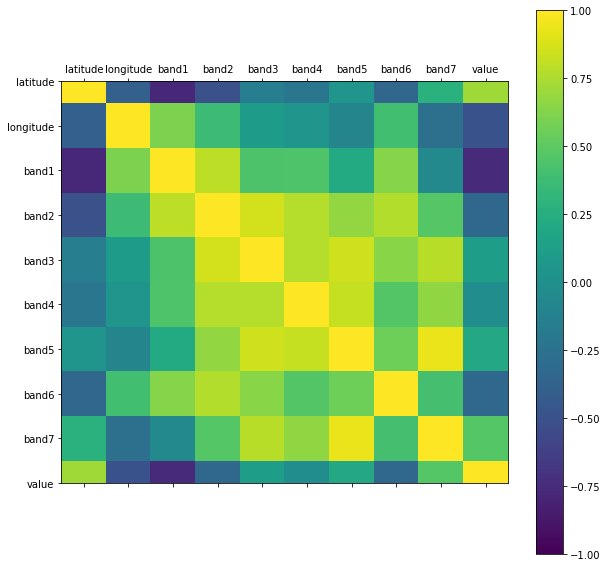

In [7]:
# correlation matrix
names=list(df)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
fig.set_size_inches(10,10)
plt.show()

# Sensor Modis

In [8]:
conexion = psycopg2.connect(host="localhost", database="modis", user="postgres", password="1q2w3e4r", port=5433)
df = pd.read_sql_query("SELECT * FROM modis_model", conexion)
df.to_csv('modis_model.csv',index=False)
df.head()

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
0,-8.79e+06,184950.0,3296.90,4486.12,3395.32,3448.01,4321.52,3236.02,2072.21,203.4
1,-8.78e+06,174600.0,2723.54,3882.38,2847.12,2902.17,3775.93,2743.97,1732.73,198.3
2,-8.78e+06,169650.0,3254.55,4358.61,3360.06,3400.07,4235.78,3224.04,2056.70,199.1
3,-8.78e+06,174600.0,3180.59,4523.59,3305.42,3344.58,4318.23,3244.02,2032.57,196.3
4,-8.78e+06,184950.0,3307.84,4718.30,3427.58,3472.93,4445.46,3319.96,2059.51,196.9


## Descripción de variables

In [9]:
df.describe()

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
count,4.45e+02,445.00,445.00,445.00,445.00,445.00,445.00,445.00,445.00,445.00
mean,-8.67e+06,173032.58,3278.96,4504.22,3383.80,3415.47,4397.34,3207.85,1970.02,210.18
std,5.66e+04,53040.04,395.71,349.15,420.19,395.12,291.64,215.47,144.10,17.34
min,-8.79e+06,45000.00,1934.56,3161.65,1897.33,2024.84,3086.36,2409.23,1582.52,188.50
25%,-8.71e+06,135000.00,3115.94,4339.87,3227.32,3267.77,4253.51,3099.44,1890.92,196.40
50%,-8.67e+06,169650.00,3305.41,4540.40,3425.99,3452.63,4431.10,3224.82,1966.49,199.20
75%,-8.62e+06,214650.00,3453.94,4730.22,3593.41,3598.34,4570.24,3345.01,2063.00,228.70
max,-8.55e+06,294750.00,4402.59,5296.90,4513.47,4525.71,5039.51,3700.45,2374.84,248.10


## Correlación de variables

In [10]:
pd.set_option('precision',2)
df.corr(method='pearson')

,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
latitude,1.00,-0.41,-0.14,-0.21,-0.19,-0.19,-6.53e-02,-0.18,-0.16,7.22e-01
longitude,-0.41,1.00,-0.11,-0.17,-0.08,-0.08,-2.95e-01,-0.23,-0.28,-5.21e-01
band1,-0.14,-0.11,1.00,0.76,0.99,1.00,6.65e-01,0.67,0.70,-2.04e-01
band2,-0.21,-0.17,0.76,1.00,0.76,0.78,9.56e-01,0.87,0.78,-1.88e-01
band3,-0.19,-0.08,0.99,0.76,1.00,1.00,6.38e-01,0.63,0.65,-2.77e-01
band4,-0.19,-0.08,1.00,0.78,1.00,1.00,6.71e-01,0.67,0.69,-2.64e-01
band5,-0.07,-0.29,0.66,0.96,0.64,0.67,1.00e+00,0.93,0.83,-1.87e-03
band6,-0.18,-0.23,0.67,0.87,0.63,0.67,9.29e-01,1.00,0.95,-6.93e-02
band7,-0.16,-0.28,0.70,0.78,0.65,0.69,8.32e-01,0.95,1.00,3.22e-02
value,0.72,-0.52,-0.20,-0.19,-0.28,-0.26,-1.87e-03,-0.07,0.03,1.00e+00


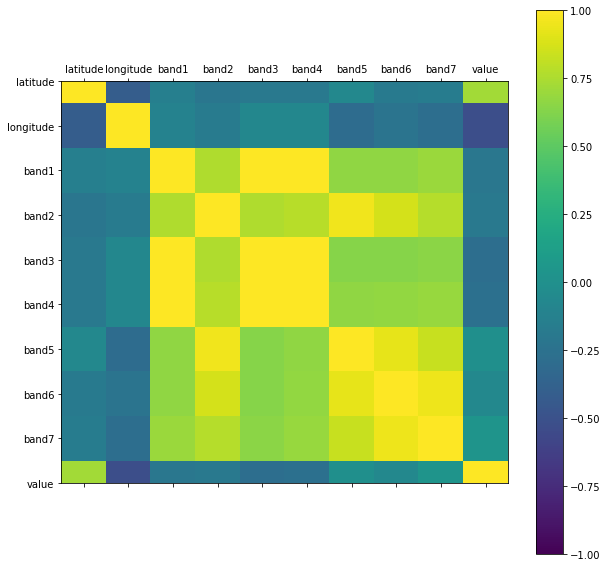

In [11]:
# correlation matrix
names=list(df)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
fig.set_size_inches(10,10)
plt.show()

# Test de carga de modelos generados

In [12]:
dff=pd.read_csv('landsat_model.csv')        
nr=dff.shape[1]
X=dff.iloc[:,0:nr-1]
y=dff.iloc[:,nr-1:nr]    
y=y.values.ravel()
print(X.shape, y.shape)
dff.head()

(434, 9) (434,)


,latitude,longitude,band1,band2,band3,band4,band5,band6,band7,value
0,-8.79e+06,184950.0,0.11,0.08,0.05,0.32,0.13,296.18,0.04,203.4
1,-8.78e+06,174600.0,0.10,0.09,0.05,0.27,0.09,295.97,0.03,198.3
2,-8.78e+06,164700.0,0.10,0.08,0.05,0.25,0.08,296.84,0.02,203.1
3,-8.78e+06,169650.0,0.11,0.09,0.06,0.34,0.13,296.12,0.04,199.1
4,-8.78e+06,174600.0,0.10,0.07,0.04,0.19,0.05,294.41,0.02,196.3


# Bibliotecas relevantes

A continuación se encuentran las bibliotecas creadas para el uso de las funciones kernel acompladas a la biblioteca sklearn

In [13]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from KSVM import KSVC, KSVR
from KANN import KANNC,KANNR
from sklearn.model_selection import train_test_split,KFold, cross_val_score,ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import numpy as np


## Funciones para el entrenamiento de los modelos

In [14]:
from time import time
from multiprocessing.pool import Pool
def numparams(params):                 
    sparams=0
    for key, value in params.items():
        sparams+=len(value)
        print(key, value)        
    return sparams

def normalizerTransform(x,nm):       
    if(nm=="Min_Max"):#mix-max
        scaler=MinMaxScaler()
        scaler.fit(x)
        return scaler.transform(x)
    if(nm=="Normalizer"):#normalizer
        scaler=Normalizer()
        scaler.fit(x)
        return scaler.transform(x)
    
    if(nm=="Standard"):#standard
        scaler=StandardScaler()
        scaler.fit(x)
        return scaler.transform(x)    
    return x

def tune_in(model,paramgrid,Xn,y,tuner='genetic',per_iter=0.4, generations_number=10,n_jobs=1):  
    
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
    t=None 
    model=model['value']
    if(tuner=='grid'):
        t = GridSearchCV(estimator=model,
          param_grid=paramgrid,
          scoring="r2",
          cv=cv,
          verbose=1,n_jobs=n_jobs)
    if(tuner=='random'):
        n_iter=int(numparams(paramgrid)*per_iter)
        t = RandomizedSearchCV(estimator=model,
                param_distributions=paramgrid,
                n_iter=n_iter,
                scoring="r2",
                cv=cv,
                verbose=1,n_jobs=n_jobs)     
    if(tuner=='genetic'):
        cv3 = EvolutionaryAlgorithmSearchCV(estimator=model,
                           params=paramgrid,
                           scoring="r2",
                           cv=cv,
                           verbose=True,
                           population_size=50,
                           gene_mutation_prob=0.10,
                           tournament_size=3,
                           generations_number=generations_number,n_jobs=n_jobs)
    st=start_time = time()
    t.fit(Xn, y)
    elapsed_time = time() - st
    print('Resultados',tuner,elapsed_time,t.best_score_, t.best_params_)        
    
    return t

def evaluateModel(db,paramgrid, model):   
        
    print("Size ",model['name'],numparams(paramgrid))   
    
    print('DB:',db,'\n')
    dff=pd.read_csv(db)        
    nr=dff.shape[1]
    X=dff.iloc[:,0:nr-1]
    y=dff.iloc[:,nr-1:nr]    
    y=y.values.ravel()

    print('dimentions',X.shape, y.shape)
    dff.head()
    normalizers=['Min_Max','Normalizer','Standard']
    tuners=[]
    for n in normalizers:
        print(n,'\n')            
        Xn=normalizerTransform(X,n) 
        print(model['name'])   
        t=tune_in(model=model,paramgrid=paramgrid,Xn=Xn,y=y,tuner='random',n_jobs=-1)
        tuners.append(t)
        df=pd.DataFrame(t.cv_results_)
        filename=str(model['name'])+'_'+n+'.csv'
        print('file',filename)
        df.to_csv(filename,index=False)
    return  tuners  

# Prueba de los modelos KSVR y KANN para los datos de radiación sensores Landsat y Modis

## Experimento 1

Evaluar el desempeño de algoritmos, normalizadores frente a diferentes funciones kernel

In [15]:
p1 ={"kernel": ['rquadratic'],
     "C": np.array([10.,100.,1000.,10000.]),
     "coef0" : np.array([1.0e-3,1.0e-2,1.0e-1,1.0,10.,100,1000])}
p2={"kernel": ['rbf','tru','can','radial_basic','triangle','hyperbolic'],
    "C": np.array([10.,100.,1000.,10000.]),
    "gamma" : np.array([1.0e-3,1.0e-2,1.0e-1,1.0,10.,100.,1000.])}
print('Landsat Model')
r1=evaluateModel('landsat_model.csv', p1, {'name':'L_KSVR0', 'value': KSVR()}) 
r2=evaluateModel('landsat_model.csv', p2, {'name':'L_KSVR1', 'value': KSVR()})
r3=evaluateModel('landsat_model.csv', p1, {'name':'L_KANNR2', 'value': KANNR(early_stopping=True, max_iter=5000)}) 
r4=evaluateModel('landsat_model.csv', p2, {'name':'L_KANNR3', 'value': KANNR(early_stopping=True, max_iter=5000)})
print('Modis Model')
r5=evaluateModel('modis_model.csv', p1, {'name':'M_KSVR0', 'value': KSVR()}) 
r6=evaluateModel('modis_model.csv', p2, {'name':'M_KSVR1', 'value': KSVR()})
r7=evaluateModel('modis_model.csv', p1, {'name':'M_KSVR2', 'value': KANNR(early_stopping=True, max_iter=5000)}) 
r8=evaluateModel('modis_model.csv', p2, {'name':'M_KSVR3', 'value': KANNR(early_stopping=True, max_iter=5000)}) 

Landsat Model
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR0 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   16.8s finished


Resultados random 18.57041096687317 0.931269281933427 {'kernel': 'rquadratic', 'coef0': 1.0, 'C': 1000.0}
file L_KSVR0_Min_Max.csv
Normalizer 

L_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.8s finished


Resultados random 16.671374082565308 0.260926828001123 {'kernel': 'rquadratic', 'coef0': 0.001, 'C': 100.0}
file L_KSVR0_Normalizer.csv
Standard 

L_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.9s finished


Resultados random 16.734506607055664 0.7481664527116892 {'kernel': 'rquadratic', 'coef0': 0.1, 'C': 10000.0}
file L_KSVR0_Standard.csv
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR1 17
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.5s finished


Resultados random 22.09527325630188 0.910089572303516 {'kernel': 'triangle', 'gamma': 1000.0, 'C': 10000.0}
file L_KSVR1_Min_Max.csv
Normalizer 

L_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.6s finished


Resultados random 29.92070984840393 0.28053510911118124 {'kernel': 'radial_basic', 'gamma': 1000.0, 'C': 1000.0}
file L_KSVR1_Normalizer.csv
Standard 

L_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Resultados random 28.827707529067993 0.8953230133339803 {'kernel': 'rbf', 'gamma': 0.001, 'C': 10000.0}
file L_KSVR1_Standard.csv
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR2 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   55.6s finished


Resultados random 62.62627840042114 0.6150425879066477 {'kernel': 'rquadratic', 'coef0': 0.001, 'C': 10.0}
file L_KANNR2_Min_Max.csv
Normalizer 

L_KANNR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.0s finished


Resultados random 13.494500160217285 -0.0030375751424077673 {'kernel': 'rquadratic', 'coef0': 0.01, 'C': 100.0}
file L_KANNR2_Normalizer.csv
Standard 

L_KANNR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.9s finished


Resultados random 25.655994415283203 -3.574991260191916 {'kernel': 'rquadratic', 'coef0': 100.0, 'C': 10.0}
file L_KANNR2_Standard.csv
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR3 17
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.4s finished


Resultados random 62.185473918914795 0.7018740745744444 {'kernel': 'hyperbolic', 'gamma': 1000.0, 'C': 100.0}
file L_KANNR3_Min_Max.csv
Normalizer 

L_KANNR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.2s finished


Resultados random 26.812039136886597 0.1983480957846908 {'kernel': 'can', 'gamma': 1000.0, 'C': 10000.0}
file L_KANNR3_Normalizer.csv
Standard 

L_KANNR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.8s finished


Resultados random 45.6739559173584 0.8437665890184496 {'kernel': 'hyperbolic', 'gamma': 0.001, 'C': 1000.0}
file L_KANNR3_Standard.csv
Modis Model
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR0 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   16.8s finished


Resultados random 18.85760998725891 0.8955528138238817 {'kernel': 'rquadratic', 'coef0': 0.1, 'C': 1000.0}
file M_KSVR0_Min_Max.csv
Normalizer 

M_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.7s finished


Resultados random 17.65389585494995 0.22392881486710603 {'kernel': 'rquadratic', 'coef0': 0.1, 'C': 1000.0}
file M_KSVR0_Normalizer.csv
Standard 

M_KSVR0
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   16.0s finished


Resultados random 17.834972620010376 0.895021626040627 {'kernel': 'rquadratic', 'coef0': 1.0, 'C': 1000.0}
file M_KSVR0_Standard.csv
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR1 17
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.3s finished


Resultados random 39.38340616226196 0.8074254056335254 {'kernel': 'can', 'gamma': 0.1, 'C': 10000.0}
file M_KSVR1_Min_Max.csv
Normalizer 

M_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.9s finished


Resultados random 25.483118295669556 0.7573447283121305 {'kernel': 'triangle', 'gamma': 0.1, 'C': 10000.0}
file M_KSVR1_Normalizer.csv
Standard 

M_KSVR1
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Resultados random 31.16411828994751 0.8598678516413999 {'kernel': 'rbf', 'gamma': 1.0, 'C': 100.0}
file M_KSVR1_Standard.csv
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR2 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   47.7s finished


Resultados random 52.87395668029785 0.5547584292965341 {'kernel': 'rquadratic', 'coef0': 100.0, 'C': 10000.0}
file M_KSVR2_Min_Max.csv
Normalizer 

M_KSVR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.6s finished


Resultados random 14.173575639724731 -0.009850422737991683 {'kernel': 'rquadratic', 'coef0': 0.01, 'C': 1000.0}
file M_KSVR2_Normalizer.csv
Standard 

M_KSVR2
kernel ['rquadratic']
C [   10.   100.  1000. 10000.]
coef0 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.0s finished


Resultados random 27.4771568775177 -4.061090585092432 {'kernel': 'rquadratic', 'coef0': 0.01, 'C': 10.0}
file M_KSVR2_Standard.csv
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR3 17
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.1s finished


Resultados random 52.58987355232239 0.6485476464418805 {'kernel': 'tru', 'gamma': 1.0, 'C': 1000.0}
file M_KSVR3_Min_Max.csv
Normalizer 

M_KSVR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.4s finished


Resultados random 26.420297622680664 0.4579281800299183 {'kernel': 'can', 'gamma': 1000.0, 'C': 1000.0}
file M_KSVR3_Normalizer.csv
Standard 

M_KSVR3
kernel ['rbf', 'tru', 'can', 'radial_basic', 'triangle', 'hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.3s finished


Resultados random 49.400654792785645 0.7492336717118924 {'kernel': 'hyperbolic', 'gamma': 1000.0, 'C': 10.0}
file M_KSVR3_Standard.csv


In [16]:
results=[r1,r2,r3,r4,r5,r6,r7,r8]
normalizers=['Min_Max','Normalizer', 'Standard'] 
print('Informe mejores resultados')
db='Landsat'
informe_mejores=[]
algoritmo='KSVR'
for i,item in enumerate(results): 
    if(i==0 or i==1 or i==4 or i==5):
        algoritmo='KSVR'
    else:
        algoritmo='KANNR'
    if(i>3):
        db='Modis'
    for j,r in enumerate(item):        
        dicresult={'db':db,'algoritmo':algoritmo,'normalizer':normalizers[j],'bestscore':r.best_score_,'bestparams': r.best_params_}
        informe_mejores.append(dicresult)
df_informe=pd.DataFrame(informe_mejores)    
display(df_informe)
df_informe.to_csv('informe_mejores.csv')

Informe mejores resultados


,db,algoritmo,normalizer,bestscore,bestparams
0,Landsat,KSVR,Min_Max,9.31e-01,"{'kernel': 'rquadratic', 'coef0': 1.0, 'C': 10..."
1,Landsat,KSVR,Normalizer,2.61e-01,"{'kernel': 'rquadratic', 'coef0': 0.001, 'C': ..."
2,Landsat,KSVR,Standard,7.48e-01,"{'kernel': 'rquadratic', 'coef0': 0.1, 'C': 10..."
3,Landsat,KSVR,Min_Max,9.10e-01,"{'kernel': 'triangle', 'gamma': 1000.0, 'C': 1..."
4,Landsat,KSVR,Normalizer,2.81e-01,"{'kernel': 'radial_basic', 'gamma': 1000.0, 'C..."
5,Landsat,KSVR,Standard,8.95e-01,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 10000.0}"
6,Landsat,KANNR,Min_Max,6.15e-01,"{'kernel': 'rquadratic', 'coef0': 0.001, 'C': ..."
7,Landsat,KANNR,Normalizer,-3.04e-03,"{'kernel': 'rquadratic', 'coef0': 0.01, 'C': 1..."
8,Landsat,KANNR,Standard,-3.57e+00,"{'kernel': 'rquadratic', 'coef0': 100.0, 'C': ..."
9,Landsat,KANNR,Min_Max,7.02e-01,"{'kernel': 'hyperbolic', 'gamma': 1000.0, 'C':..."


## Experimento 2

Encontrar la mejor configuración de hiperparametros para cada kernel

In [17]:
C_param=np.array([10.,100.,1000.,10000.])
gamma_param=np.array([1.0e-3,1.0e-2,1.0e-1,1.0,10.,100.,1000.])
kernels_param=['rbf','tru','can','radial_basic','triangle','hyperbolic']
print('Landsat Sensor')
kresultsls=[r1]
kresultsla=[r3]
for k in kernels_param:
    params={"kernel": [k],"C":C_param,"gamma" : gamma_param}
    ksvr=evaluateModel('landsat_model.csv', params, {'name':'L_KSVR_'+k, 'value': KSVR()})
    anvr=evaluateModel('landsat_model.csv', params, {'name':'L_KANNR_'+k, 'value': KANNR(early_stopping=True, max_iter=5000)}) 
    kresultsls.append(ksvr)
    kresultsla.append(anvr)
    
print('Modis Sensor')
kresultsms=[r5]
kresultsma=[r7]
for k in kernels_param:
    params={"kernel": [k],"C":C_param,"gamma" : gamma_param}
    ksvr=evaluateModel('modis_model.csv', params, {'name':'M_KSVR_'+k, 'value': KSVR()})
    anvr=evaluateModel('modis_model.csv', params, {'name':'M_KANNR_'+k, 'value': KANNR(early_stopping=True, max_iter=5000)}) 
    kresultsms.append(ksvr)
    kresultsma.append(anvr)
    

Landsat Sensor
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_rbf 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


Resultados random 0.3101694583892822 0.9129779935688744 {'kernel': 'rbf', 'gamma': 10.0, 'C': 10.0}
file L_KSVR_rbf_Min_Max.csv
Normalizer 

L_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Resultados random 0.1520378589630127 0.1885694484308928 {'kernel': 'rbf', 'gamma': 100.0, 'C': 1000.0}
file L_KSVR_rbf_Normalizer.csv
Standard 

L_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished


Resultados random 1.777719259262085 0.9079125987609065 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10000.0}
file L_KSVR_rbf_Standard.csv
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_rbf 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   45.8s finished


Resultados random 57.310861587524414 0.7012680770170832 {'kernel': 'rbf', 'gamma': 1.0, 'C': 10000.0}
file L_KANNR_rbf_Min_Max.csv
Normalizer 

L_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.4s finished


Resultados random 14.74616527557373 -0.003206617349285423 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10.0}
file L_KANNR_rbf_Normalizer.csv
Standard 

L_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.3s finished


Resultados random 64.39558362960815 0.716954252359334 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10.0}
file L_KANNR_rbf_Standard.csv
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_tru 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.8s finished


Resultados random 26.8053081035614 0.8838001643009364 {'kernel': 'tru', 'gamma': 100.0, 'C': 10000.0}
file L_KSVR_tru_Min_Max.csv
Normalizer 

L_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.2s finished


Resultados random 27.248314380645752 0.7856202104399588 {'kernel': 'tru', 'gamma': 0.01, 'C': 10000.0}
file L_KSVR_tru_Normalizer.csv
Standard 

L_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.4s finished


Resultados random 25.155985832214355 0.683304761268049 {'kernel': 'tru', 'gamma': 0.1, 'C': 100.0}
file L_KSVR_tru_Standard.csv
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_tru 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.4s finished


Resultados random 28.028489351272583 -0.007983860871723269 {'kernel': 'tru', 'gamma': 1000.0, 'C': 10.0}
file L_KANNR_tru_Min_Max.csv
Normalizer 

L_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.2s finished


Resultados random 27.660846948623657 0.2134341865390665 {'kernel': 'tru', 'gamma': 0.01, 'C': 10.0}
file L_KANNR_tru_Normalizer.csv
Standard 

L_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   34.9s finished


Resultados random 42.266714572906494 0.5079828991778067 {'kernel': 'tru', 'gamma': 10.0, 'C': 100.0}
file L_KANNR_tru_Standard.csv
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_can 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.6s finished


Resultados random 30.89946460723877 0.8761179672364553 {'kernel': 'can', 'gamma': 1.0, 'C': 100.0}
file L_KSVR_can_Min_Max.csv
Normalizer 

L_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.8s finished


Resultados random 31.288740158081055 0.8357597428447638 {'kernel': 'can', 'gamma': 0.01, 'C': 10000.0}
file L_KSVR_can_Normalizer.csv
Standard 

L_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.8s finished


Resultados random 31.18629765510559 0.8473406359197327 {'kernel': 'can', 'gamma': 10.0, 'C': 1000.0}
file L_KSVR_can_Standard.csv
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_can 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.0s finished


Resultados random 44.903520822525024 0.44528908037603027 {'kernel': 'can', 'gamma': 10.0, 'C': 10000.0}
file L_KANNR_can_Min_Max.csv
Normalizer 

L_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.8s finished


Resultados random 35.53245949745178 0.7278920533220165 {'kernel': 'can', 'gamma': 10.0, 'C': 10.0}
file L_KANNR_can_Normalizer.csv
Standard 

L_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.6s finished


Resultados random 25.018043518066406 0.7221197000128469 {'kernel': 'can', 'gamma': 100.0, 'C': 1000.0}
file L_KANNR_can_Standard.csv
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_radial_basic 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.5s finished


Resultados random 24.46940803527832 0.9044704687713742 {'kernel': 'radial_basic', 'gamma': 0.1, 'C': 1000.0}
file L_KSVR_radial_basic_Min_Max.csv
Normalizer 

L_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.4s finished


Resultados random 21.267838716506958 0.2937345125906028 {'kernel': 'radial_basic', 'gamma': 1000.0, 'C': 100.0}
file L_KSVR_radial_basic_Normalizer.csv
Standard 

L_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.9min finished


Resultados random 369.1142518520355 0.8992882606564394 {'kernel': 'radial_basic', 'gamma': 0.01, 'C': 10000.0}
file L_KSVR_radial_basic_Standard.csv
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_radial_basic 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.7s finished


Resultados random 14.340200424194336 -0.010662042180472175 {'kernel': 'radial_basic', 'gamma': 0.001, 'C': 100.0}
file L_KANNR_radial_basic_Min_Max.csv
Normalizer 

L_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.0s finished


Resultados random 9.778440952301025 -0.010262621537180517 {'kernel': 'radial_basic', 'gamma': 0.1, 'C': 100.0}
file L_KANNR_radial_basic_Normalizer.csv
Standard 

L_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.0s finished


Resultados random 25.265971899032593 0.18527804241583015 {'kernel': 'radial_basic', 'gamma': 1.0, 'C': 100.0}
file L_KANNR_radial_basic_Standard.csv
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_triangle 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.7s finished


Resultados random 14.926387548446655 0.7904294190938833 {'kernel': 'triangle', 'gamma': 1000.0, 'C': 1000.0}
file L_KSVR_triangle_Min_Max.csv
Normalizer 

L_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.3s finished


Resultados random 15.599289655685425 0.4491665740031102 {'kernel': 'triangle', 'gamma': 1.0, 'C': 10000.0}
file L_KSVR_triangle_Normalizer.csv
Standard 

L_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.9s finished


Resultados random 14.987207174301147 0.930183220877671 {'kernel': 'triangle', 'gamma': 100.0, 'C': 1000.0}
file L_KSVR_triangle_Standard.csv
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_triangle 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.5s finished


Resultados random 36.81065249443054 0.012720346644950474 {'kernel': 'triangle', 'gamma': 0.1, 'C': 10000.0}
file L_KANNR_triangle_Min_Max.csv
Normalizer 

L_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   33.4s finished


Resultados random 35.065277099609375 -0.010809706168882948 {'kernel': 'triangle', 'gamma': 100.0, 'C': 1000.0}
file L_KANNR_triangle_Normalizer.csv
Standard 

L_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   44.9s finished


Resultados random 55.900716066360474 0.5698142735805266 {'kernel': 'triangle', 'gamma': 100.0, 'C': 10000.0}
file L_KANNR_triangle_Standard.csv
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KSVR_hyperbolic 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.7s finished


Resultados random 7.890129566192627 0.8563214611821496 {'kernel': 'hyperbolic', 'gamma': 0.01, 'C': 10000.0}
file L_KSVR_hyperbolic_Min_Max.csv
Normalizer 

L_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.5s finished


Resultados random 8.598719120025635 -0.3162825657281368 {'kernel': 'hyperbolic', 'gamma': 0.1, 'C': 1000.0}
file L_KSVR_hyperbolic_Normalizer.csv
Standard 

L_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished


Resultados random 8.20961594581604 0.8305189979451012 {'kernel': 'hyperbolic', 'gamma': 0.01, 'C': 100.0}
file L_KSVR_hyperbolic_Standard.csv
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  L_KANNR_hyperbolic 12
DB: landsat_model.csv 

dimentions (434, 9) (434,)
Min_Max 

L_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


Resultados random 100.42558813095093 0.5165187128263332 {'kernel': 'hyperbolic', 'gamma': 10.0, 'C': 1000.0}
file L_KANNR_hyperbolic_Min_Max.csv
Normalizer 

L_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.4s finished


Resultados random 20.43293833732605 -0.004158554781385026 {'kernel': 'hyperbolic', 'gamma': 1.0, 'C': 10.0}
file L_KANNR_hyperbolic_Normalizer.csv
Standard 

L_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.2s finished


Resultados random 31.1833016872406 0.8455007048963976 {'kernel': 'hyperbolic', 'gamma': 1.0, 'C': 100.0}
file L_KANNR_hyperbolic_Standard.csv
Modis Sensor
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_rbf 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Resultados random 3.8322784900665283 0.9025538359332266 {'kernel': 'rbf', 'gamma': 10.0, 'C': 100.0}
file M_KSVR_rbf_Min_Max.csv
Normalizer 

M_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Resultados random 0.19615721702575684 0.22250797722369717 {'kernel': 'rbf', 'gamma': 100.0, 'C': 100.0}
file M_KSVR_rbf_Normalizer.csv
Standard 

M_KSVR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Resultados random 14.374040603637695 0.8598678516413999 {'kernel': 'rbf', 'gamma': 1.0, 'C': 100.0}
file M_KSVR_rbf_Standard.csv
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_rbf 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


Resultados random 69.60408687591553 0.5696807991771108 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10.0}
file M_KANNR_rbf_Min_Max.csv
Normalizer 

M_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   17.1s finished


Resultados random 19.87014865875244 0.03508897378492604 {'kernel': 'rbf', 'gamma': 1000.0, 'C': 10000.0}
file M_KANNR_rbf_Normalizer.csv
Standard 

M_KANNR_rbf
kernel ['rbf']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


Resultados random 74.27298069000244 0.5261274909176437 {'kernel': 'rbf', 'gamma': 0.1, 'C': 100.0}
file M_KANNR_rbf_Standard.csv
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_tru 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.4s finished


Resultados random 28.154518365859985 0.8187025976532287 {'kernel': 'tru', 'gamma': 100.0, 'C': 10000.0}
file M_KSVR_tru_Min_Max.csv
Normalizer 

M_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.5s finished


Resultados random 28.376864910125732 0.8464350015141694 {'kernel': 'tru', 'gamma': 0.001, 'C': 10000.0}
file M_KSVR_tru_Normalizer.csv
Standard 

M_KSVR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished


Resultados random 27.789941549301147 0.8113291353543581 {'kernel': 'tru', 'gamma': 1.0, 'C': 100.0}
file M_KSVR_tru_Standard.csv
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_tru 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.6s finished


Resultados random 45.76029825210571 0.6640288694707059 {'kernel': 'tru', 'gamma': 1.0, 'C': 10.0}
file M_KANNR_tru_Min_Max.csv
Normalizer 

M_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.0s finished


Resultados random 27.66964316368103 0.17962205423372346 {'kernel': 'tru', 'gamma': 0.01, 'C': 10.0}
file M_KANNR_tru_Normalizer.csv
Standard 

M_KANNR_tru
kernel ['tru']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   39.9s finished


Resultados random 50.72211694717407 0.47475680860710545 {'kernel': 'tru', 'gamma': 10.0, 'C': 10000.0}
file M_KANNR_tru_Standard.csv
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_can 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.6s finished


Resultados random 33.08483028411865 0.8074136046029472 {'kernel': 'can', 'gamma': 1.0, 'C': 1000.0}
file M_KSVR_can_Min_Max.csv
Normalizer 

M_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.6s finished


Resultados random 34.13413405418396 0.7719617026814956 {'kernel': 'can', 'gamma': 10.0, 'C': 1000.0}
file M_KSVR_can_Normalizer.csv
Standard 

M_KSVR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.3s finished


Resultados random 32.69219183921814 0.785861544152872 {'kernel': 'can', 'gamma': 0.01, 'C': 10000.0}
file M_KSVR_can_Standard.csv
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_can 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   40.2s finished


Resultados random 52.28008699417114 0.2515770874112521 {'kernel': 'can', 'gamma': 1.0, 'C': 10.0}
file M_KANNR_can_Min_Max.csv
Normalizer 

M_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   44.3s finished


Resultados random 51.40875720977783 0.39959719122002535 {'kernel': 'can', 'gamma': 100.0, 'C': 1000.0}
file M_KANNR_can_Normalizer.csv
Standard 

M_KANNR_can
kernel ['can']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.2s finished


Resultados random 37.50374913215637 0.4495948863044968 {'kernel': 'can', 'gamma': 0.1, 'C': 10.0}
file M_KANNR_can_Standard.csv
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_radial_basic 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.9s finished


Resultados random 23.513094663619995 0.8442173295015815 {'kernel': 'radial_basic', 'gamma': 1.0, 'C': 10.0}
file M_KSVR_radial_basic_Min_Max.csv
Normalizer 

M_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.2s finished


Resultados random 24.00706195831299 0.5220905539157396 {'kernel': 'radial_basic', 'gamma': 1000.0, 'C': 10000.0}
file M_KSVR_radial_basic_Normalizer.csv
Standard 

M_KSVR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.8min finished


Resultados random 352.3622281551361 0.8825866340989454 {'kernel': 'radial_basic', 'gamma': 0.001, 'C': 10000.0}
file M_KSVR_radial_basic_Standard.csv
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_radial_basic 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished


Resultados random 28.917187213897705 0.7658026992425249 {'kernel': 'radial_basic', 'gamma': 10.0, 'C': 10000.0}
file M_KANNR_radial_basic_Min_Max.csv
Normalizer 

M_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.2s finished


Resultados random 12.8695650100708 0.032747062804275466 {'kernel': 'radial_basic', 'gamma': 1000.0, 'C': 10000.0}
file M_KANNR_radial_basic_Normalizer.csv
Standard 

M_KANNR_radial_basic
kernel ['radial_basic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.3s finished


Resultados random 33.20462155342102 0.7375034546379423 {'kernel': 'radial_basic', 'gamma': 0.1, 'C': 10000.0}
file M_KANNR_radial_basic_Standard.csv
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_triangle 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.6s finished


Resultados random 15.270468473434448 0.8454816905639313 {'kernel': 'triangle', 'gamma': 10.0, 'C': 100.0}
file M_KSVR_triangle_Min_Max.csv
Normalizer 

M_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.7s finished


Resultados random 15.305491209030151 0.0024443003342186124 {'kernel': 'triangle', 'gamma': 1.0, 'C': 10.0}
file M_KSVR_triangle_Normalizer.csv
Standard 

M_KSVR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.3s finished


Resultados random 14.804560422897339 0.8152031844451675 {'kernel': 'triangle', 'gamma': 10.0, 'C': 10.0}
file M_KSVR_triangle_Standard.csv
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_triangle 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   34.6s finished


Resultados random 41.55627393722534 0.6793951907772857 {'kernel': 'triangle', 'gamma': 10.0, 'C': 1000.0}
file M_KANNR_triangle_Min_Max.csv
Normalizer 

M_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   35.6s finished


Resultados random 44.32349157333374 -0.005814230715543609 {'kernel': 'triangle', 'gamma': 0.001, 'C': 10000.0}
file M_KANNR_triangle_Normalizer.csv
Standard 

M_KANNR_triangle
kernel ['triangle']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   33.3s finished


Resultados random 40.92450022697449 0.6334693659519869 {'kernel': 'triangle', 'gamma': 10.0, 'C': 10.0}
file M_KANNR_triangle_Standard.csv
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KSVR_hyperbolic 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s finished


Resultados random 8.597851514816284 0.7779262465423259 {'kernel': 'hyperbolic', 'gamma': 0.01, 'C': 10000.0}
file M_KSVR_hyperbolic_Min_Max.csv
Normalizer 

M_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.1s finished


Resultados random 9.089077234268188 0.14403937629788666 {'kernel': 'hyperbolic', 'gamma': 1.0, 'C': 10000.0}
file M_KSVR_hyperbolic_Normalizer.csv
Standard 

M_KSVR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.6s finished


Resultados random 8.44412612915039 -30.887612565997927 {'kernel': 'hyperbolic', 'gamma': 0.01, 'C': 1000.0}
file M_KSVR_hyperbolic_Standard.csv
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Size  M_KANNR_hyperbolic 12
DB: modis_model.csv 

dimentions (445, 9) (445,)
Min_Max 

M_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


Resultados random 73.06162810325623 0.04079698976387497 {'kernel': 'hyperbolic', 'gamma': 1.0, 'C': 10.0}
file M_KANNR_hyperbolic_Min_Max.csv
Normalizer 

M_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.3s finished


Resultados random 21.449402809143066 -0.01051440754787849 {'kernel': 'hyperbolic', 'gamma': 1000.0, 'C': 1000.0}
file M_KANNR_hyperbolic_Normalizer.csv
Standard 

M_KANNR_hyperbolic
kernel ['hyperbolic']
C [   10.   100.  1000. 10000.]
gamma [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.2s finished


Resultados random 37.01323676109314 0.7547003440108363 {'kernel': 'hyperbolic', 'gamma': 0.001, 'C': 1000.0}
file M_KANNR_hyperbolic_Standard.csv


In [112]:
def get_metrics(result):
    
    i=np.argmax(result['mean_test_score'])
    vec=[]
    for j in range(5):
        vec.append(result['split'+str(j)+'_test_score'][i])
    return vec

def plot_boxplot(title,results,names):
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    fig.set_size_inches(8,6)
    plt.show()

def plot_boxplots(cvresults,db):
    mkernels=['rq','rbf','tru','can','rb','tri','hyp']
    mnormalizers=['Min_Max','Normalizer', 'Standard'] 
    
    for j,norm in enumerate(mnormalizers):
        results=[]
        title=db+' '+norm
        for i,kern in enumerate(mkernels):
            
            results.append(get_metrics(cvresults[i][j].cv_results_))
        plot_boxplot(title, results,mkernels)
        
def plot_boxplots_best(cvresults,db, score):
    mkernels=['rq','rbf','tru','can','rb','tri','hyp']
    mnormalizers=['Min_Max','Normalizer', 'Standard'] 
    results=[]
    results_names=[]
    for j,norm in enumerate(mnormalizers):       
        
        for i,kern in enumerate(mkernels):
            cvr=cvresults[i][j]
            bs=cvr.best_score_
            vcv=np.array(get_metrics(cvr.cv_results_))
            
            if(bs-vcv.std()>=score and bs+vcv.std()>=score):
                results.append(vcv)
                results_names.append(kern+' '+norm+ " mean {0:.2f}".format(vcv.mean()))
    plot_boxplot(db, results,results_names)
#get_metrics(kresultsls[0][0].cv_results_)

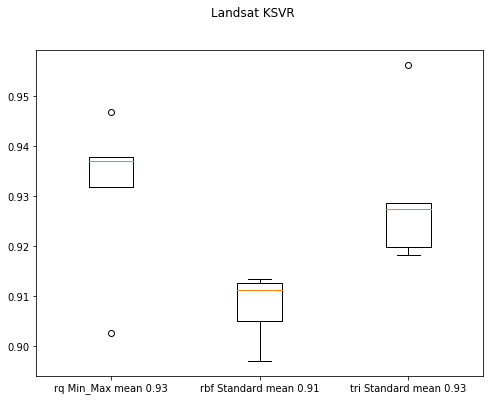

'5.12'

In [113]:

plot_boxplots_best(kresultsls,'Landsat KSVR', score=0.9)

"{0:.2f}".format(5.1234554321)

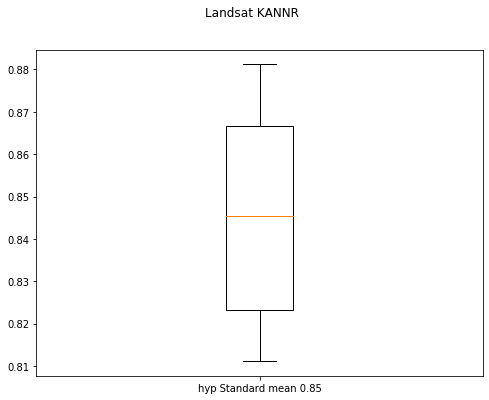

In [115]:
plot_boxplots_best(kresultsla,'Landsat KANNR',score=0.8)



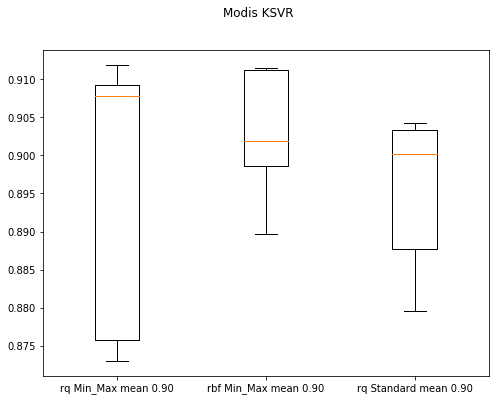

In [134]:
plot_boxplots_best(kresultsms,'Modis KSVR', score=0.87)


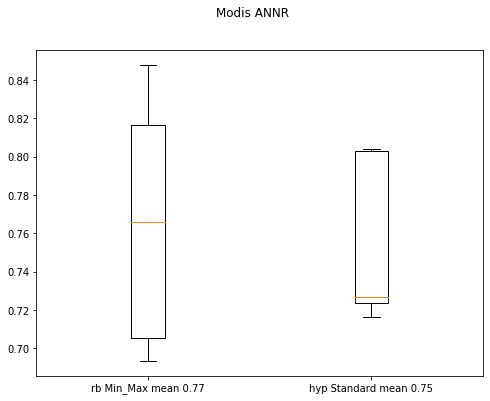

In [127]:
plot_boxplots_best(kresultsma,'Modis ANNR', 0.7)

In [25]:
r=kresultsls+kresultsla+kresultsms+kresultsma
db=""
normalizers=['Min_Max','Normalizer', 'Standard'] 
lst_result=[]
for i,item in enumerate(r):

    if(i<14):
        db="Landsat"
    else:
        db="Modis"
    index_n=0
    for tuner in item:
        algoritmo=str(tuner.estimator)
        algoritmo=algoritmo.split('(')[0]
        kernel=tuner.param_distributions['kernel'][0]
        normalizer=normalizers[index_n]
        best_index=tuner.best_index_
        mean_fit_time=tuner.cv_results_['mean_fit_time'][best_index]
        std_fit_time=tuner.cv_results_['mean_fit_time'][best_index]
        
        v_best=get_metrics(tuner.cv_results_)
        v_best=np.array(v_best) 
        lst_result.append({'db':db, 'algoritm':algoritmo, 'normalizer':normalizer, 
                           'kernel':kernel, 'best_score':tuner.best_score_,
                           'std_best_score':v_best.std(),'fit_time':mean_fit_time,
                           'std_fit_time':std_fit_time, 'best_params':tuner.best_params_})
        
        index_n+=1
        if(index_n>3):
            index_n=0
df_exp=pd.DataFrame(lst_result)    
df_exp.to_csv('informe_experimentofinal.csv')
display(df_exp[df_exp['db']=='Landsat'][df_exp['best_score']>0].sort_values(['best_score','db','algoritm','normalizer','kernel'],ascending=False))


C:\Users\Aula_info\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,db,algoritm,normalizer,kernel,best_score,std_best_score,fit_time,std_fit_time,best_params
0,Landsat,KSVR,Min_Max,rquadratic,0.93,1.50e-02,2.28e+00,2.28e+00,"{'kernel': 'rquadratic', 'coef0': 1.0, 'C': 10..."
17,Landsat,KSVR,Standard,triangle,0.93,1.37e-02,2.06e+00,2.06e+00,"{'kernel': 'triangle', 'gamma': 100.0, 'C': 10..."
3,Landsat,KSVR,Min_Max,rbf,0.91,2.57e-02,2.97e-02,2.97e-02,"{'kernel': 'rbf', 'gamma': 10.0, 'C': 10.0}"
5,Landsat,KSVR,Standard,rbf,0.91,6.15e-03,5.06e-01,5.06e-01,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 10000.0}"
12,Landsat,KSVR,Min_Max,radial_basic,0.90,1.27e-02,3.88e+00,3.88e+00,"{'kernel': 'radial_basic', 'gamma': 0.1, 'C': ..."
14,Landsat,KSVR,Standard,radial_basic,0.90,6.19e-03,2.35e+01,2.35e+01,"{'kernel': 'radial_basic', 'gamma': 0.01, 'C':..."
6,Landsat,KSVR,Min_Max,tru,0.88,1.69e-02,4.21e+00,4.21e+00,"{'kernel': 'tru', 'gamma': 100.0, 'C': 10000.0}"
9,Landsat,KSVR,Min_Max,can,0.88,1.86e-02,4.38e+00,4.38e+00,"{'kernel': 'can', 'gamma': 1.0, 'C': 100.0}"
18,Landsat,KSVR,Min_Max,hyperbolic,0.86,1.67e-02,1.11e+00,1.11e+00,"{'kernel': 'hyperbolic', 'gamma': 0.01, 'C': 1..."
11,Landsat,KSVR,Standard,can,0.85,1.17e-02,4.34e+00,4.34e+00,"{'kernel': 'can', 'gamma': 10.0, 'C': 1000.0}"


In [26]:
display(df_exp[df_exp['db']=='Modis'][df_exp['best_score']>0]
        .sort_values(['best_score','db','algoritm','normalizer','kernel'],ascending=False))

C:\Users\Aula_info\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,db,algoritm,normalizer,kernel,best_score,std_best_score,fit_time,std_fit_time,best_params
45,Modis,KSVR,Min_Max,rbf,9.03e-01,8.18e-03,0.12,0.12,"{'kernel': 'rbf', 'gamma': 10.0, 'C': 100.0}"
42,Modis,KSVR,Min_Max,rquadratic,8.96e-01,1.73e-02,2.86,2.86,"{'kernel': 'rquadratic', 'coef0': 0.1, 'C': 10..."
44,Modis,KSVR,Standard,rquadratic,8.95e-01,9.72e-03,2.60,2.60,"{'kernel': 'rquadratic', 'coef0': 1.0, 'C': 10..."
56,Modis,KSVR,Standard,radial_basic,8.83e-01,2.83e-02,4.16,4.16,"{'kernel': 'radial_basic', 'gamma': 0.001, 'C'..."
47,Modis,KSVR,Standard,rbf,8.60e-01,1.71e-02,0.07,0.07,"{'kernel': 'rbf', 'gamma': 1.0, 'C': 100.0}"
49,Modis,KSVR,Normalizer,tru,8.46e-01,1.22e-02,4.09,4.09,"{'kernel': 'tru', 'gamma': 0.001, 'C': 10000.0}"
57,Modis,KSVR,Min_Max,triangle,8.45e-01,2.64e-02,2.39,2.39,"{'kernel': 'triangle', 'gamma': 10.0, 'C': 100.0}"
54,Modis,KSVR,Min_Max,radial_basic,8.44e-01,3.71e-02,3.28,3.28,"{'kernel': 'radial_basic', 'gamma': 1.0, 'C': ..."
48,Modis,KSVR,Min_Max,tru,8.19e-01,2.14e-02,3.98,3.98,"{'kernel': 'tru', 'gamma': 100.0, 'C': 10000.0}"
59,Modis,KSVR,Standard,triangle,8.15e-01,3.00e-02,2.05,2.05,"{'kernel': 'triangle', 'gamma': 10.0, 'C': 10.0}"
